In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
print('전체학습데이터', len(train_data))

전체학습데이터 404290


In [4]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [5]:
train_set[0]

'What is the step by step guide to invest in share market in india?'

In [6]:
len(train_set)

808580

In [7]:
print(train_set[404290])

What is the step by step guide to invest in share market?


In [8]:
print('훈련 데이터의 총 질문수 :{}'.format(len(np.unique(train_set))))

훈련 데이터의 총 질문수 :537361


In [9]:
print('중복 질문 수: {}'.format(np.sum(train_set.value_counts() > 1 )))

중복 질문 수: 111873


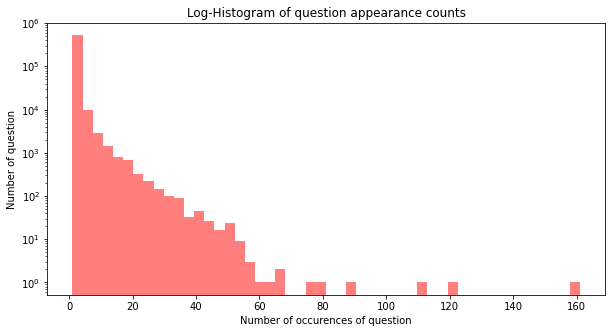

In [10]:
plt.figure(figsize = (10,5))
plt.hist(train_set.value_counts(), bins= 50, alpha = 0.5, color='r')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of question')
plt.show()

In [11]:
print('중복 최대 개수 : {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수 : {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수 : {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차 : {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간 : {}'.format(np.median(train_set.value_counts())))
print('중복 1사분위 : {}'.format(np.percentile(train_set.value_counts(), 25)))
print('중복 3사분위 : {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수 : 161
중복 최소 개수 : 1
중복 평균 개수 : 1.50
중복 표준편차 : 1.91
중복 중간 : 1.0
중복 1사분위 : 1.0
중복 3사분위 : 1.0


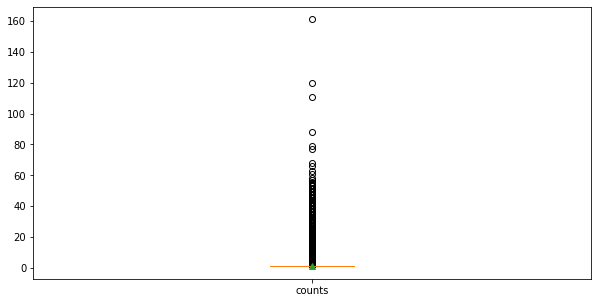

In [12]:
plt.figure(figsize=(10,5))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans = True)
plt.show()

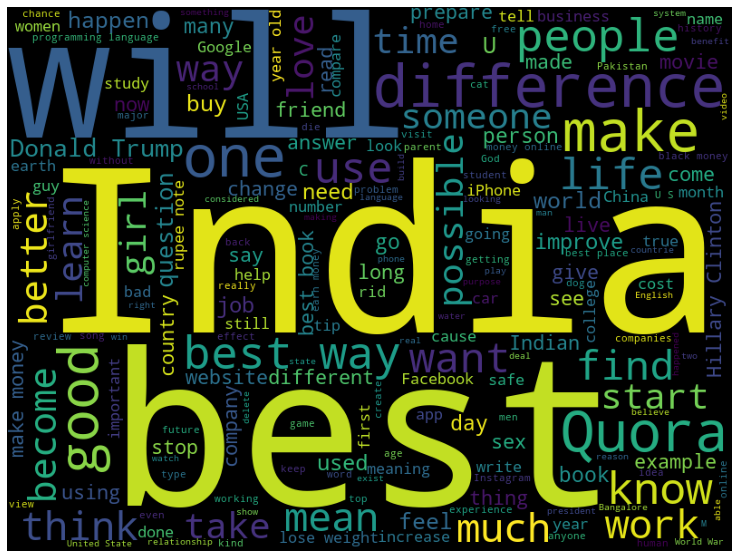

In [13]:
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height = 600).generate(' '.join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

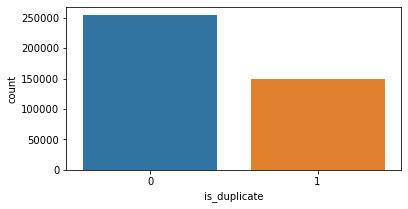

In [14]:
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(6,3)
sns.countplot(x=train_data['is_duplicate'])
plt.show()

In [15]:
train_length = train_set.apply(len)

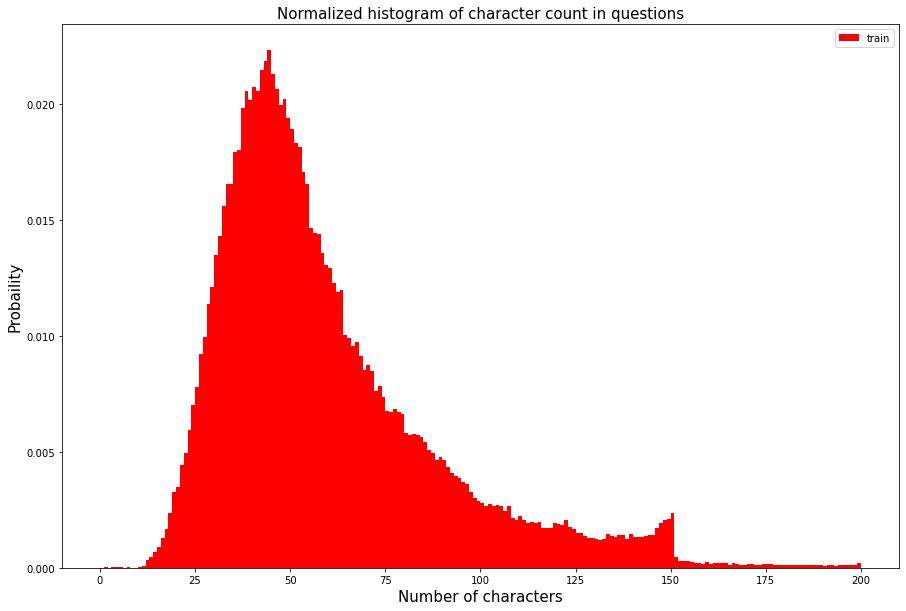

In [16]:
plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0,200], facecolor ='r', density=True, label='train')
plt.title('Normalized histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize = 15)
plt.ylabel('Probaility', fontsize = 15)
plt.show()

In [17]:
print('질문 최대 개수 : {}'.format(np.max(train_length)))
print('질문 최소 개수 : {}'.format(np.min(train_length)))
print('질문 평균 개수 : {:.2f}'.format(np.mean(train_length)))
print('질문 표준편차 : {:.2f}'.format(np.std(train_length)))
print('질문 중간 : {}'.format(np.median(train_length)))
print('질문 1사분위 : {}'.format(np.percentile(train_length, 25)))
print('질문 3사분위 : {}'.format(np.percentile(train_length, 75)))

질문 최대 개수 : 1169
질문 최소 개수 : 1
질문 평균 개수 : 59.82
질문 표준편차 : 31.96
질문 중간 : 51.0
질문 1사분위 : 39.0
질문 3사분위 : 72.0


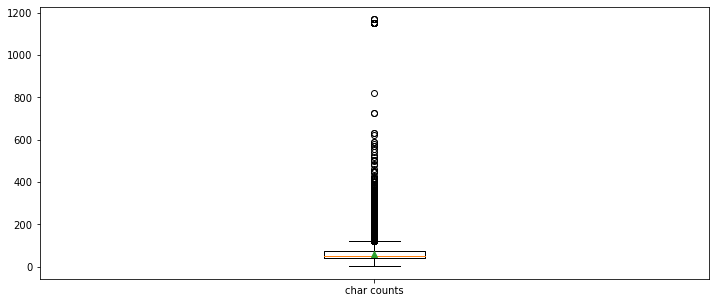

In [18]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['char counts'], showmeans=True)
plt.show()

In [19]:
train_word_counts = train_set.apply(lambda x : len(x.split()))

In [20]:
print('단어 최대 개수 : {}'.format(np.max(train_word_counts)))
print('단어 최소 개수 : {}'.format(np.min(train_word_counts)))
print('단어 평균 개수 : {:.2f}'.format(np.mean(train_word_counts)))
print('단어 표준편차 : {:.2f}'.format(np.std(train_word_counts)))
print('단어 중간 : {}'.format(np.median(train_word_counts)))
print('단어 1사분위 : {}'.format(np.percentile(train_word_counts, 25)))
print('단어 3사분위 : {}'.format(np.percentile(train_word_counts, 75)))
print('단어 99퍼센트 : {}'.format(np.percentile(train_word_counts, 99)))

단어 최대 개수 : 237
단어 최소 개수 : 1
단어 평균 개수 : 11.06
단어 표준편차 : 5.88
단어 중간 : 10.0
단어 1사분위 : 7.0
단어 3사분위 : 13.0
단어 99퍼센트 : 31.0


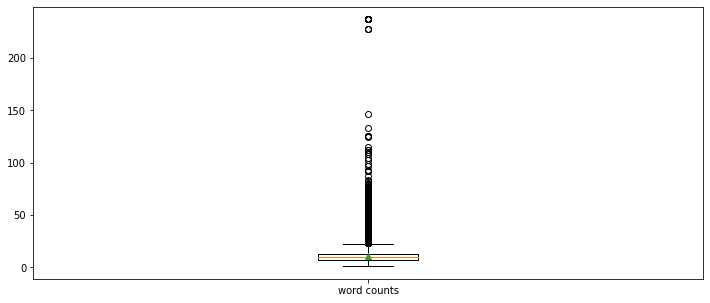

In [21]:
plt.figure(figsize=(12,5))
plt.boxplot(train_word_counts, labels=['word counts'], showmeans=True)
plt.show()

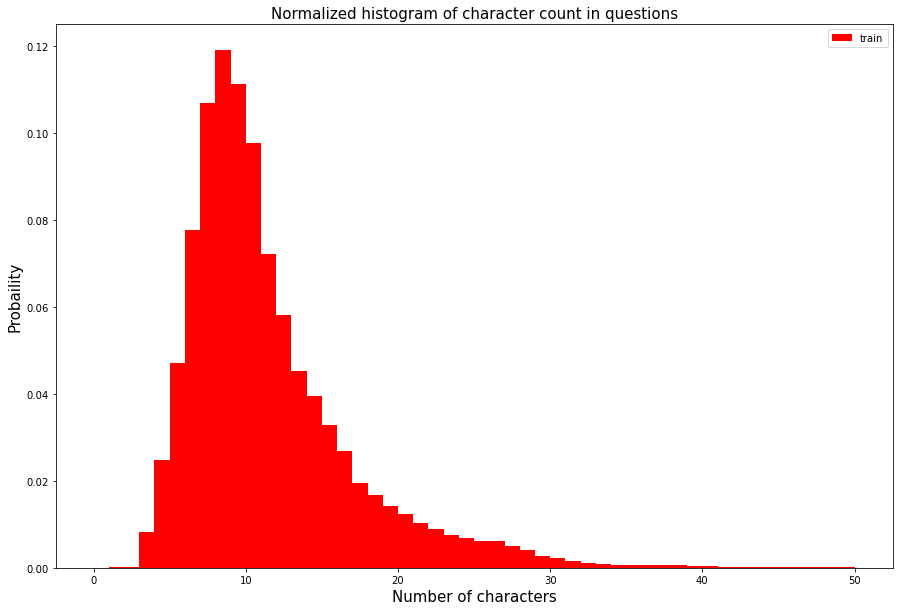

In [22]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, range=[0,50], facecolor ='r', density=True, label='train')
plt.title('Normalized histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize = 15)
plt.ylabel('Probaility', fontsize = 15)
plt.show()

In [23]:
qmarks = np.mean(train_set.apply(lambda x : '?' in x))
math = np.mean(train_set.apply(lambda x : '[math]' in x)) #수학기호를 찾음 
fullstop = np.mean(train_set.apply(lambda x : '.' in x))
capital_first = np.mean(train_set.apply(lambda x : x[0].isupper()))
capital = np.mean(train_set.apply(lambda x : max(y.isupper() for y in x)))
numbers = np.mean(train_set.apply(lambda x : max(y.isdigit() for y in x)))

print('물음표 질문: {:.2f}'.format(qmarks*100))
print('수학태그 질문: {:.2f}'.format(math*100))
print('마침표 질문: {:.2f}'.format(fullstop*100))
print('첫글자 대문자 질문: {:.2f}'.format(capital_first*100))
print('대문자 포함 질문: {:.2f}'.format(capital*100))
print('숫자 질문: {:.2f}'.format(numbers*100))

물음표 질문: 99.87
수학태그 질문: 0.12
마침표 질문: 6.31
첫글자 대문자 질문: 99.81
대문자 포함 질문: 99.95
숫자 질문: 11.83


In [24]:
import re 
import json 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [25]:
FILTERS = r'[~.,!?"\':;]'
MAX_SEQUENCE_LENGTH = 31
#전체 99퍼센트가 단어갯수 31개 이하임

In [26]:
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data))

train_neg_data = train_neg_data.sample(frac=sample_frac)

- 예를 들면 중복이 아닌 것이 10000 개, 중복인것이 3000개일 경우 
- 둘의 차이는 7000개 
- 위의 식으로 샘플 % 를 구하면 (1- 7000/10000) =0.3
- 10000* 0.3 = 3000개

In [27]:
print('중복 질문 : {}'.format(len(train_pos_data)))
print('중복 아닌 질문 : {}'.format(len(train_neg_data)))

중복 질문 : 149263
중복 아닌 질문 : 149263


In [28]:
train_data = pd.concat([train_neg_data, train_pos_data])

In [29]:
change_filter = re.compile(FILTERS)

question1 = [str(s) for s in train_data['question1']]
question2 = [str(s) for s in train_data['question2']]

filtered_question1 = list()
filtered_question2 = list()

for q in question1:
    filtered_question1.append(re.sub(change_filter, '', q).lower())

for q in question2:
    filtered_question2.append(re.sub(change_filter, '', q).lower())

In [30]:
print(filtered_question1[:3])

['what are the top animation colleges in india', 'how do the casper leesa tuft & needle and yogabed mattresses compare to each other', 'what is the scope for biomedical engineering in india']


In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_question1 + filtered_question2)

In [32]:
question1_sequence = tokenizer.texts_to_sequences(filtered_question1)
question2_sequence = tokenizer.texts_to_sequences(filtered_question2)

In [33]:
print(question1_sequence[:3])

[[2, 11, 1, 213, 3234, 743, 8, 35], [4, 9, 1, 44995, 44996, 34006, 11930, 12, 44997, 17450, 159, 6, 422, 100], [2, 3, 1, 876, 14, 5043, 131, 8, 35]]


In [34]:
q1_data = pad_sequences(question1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(question2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [35]:
word_vocab = tokenizer.word_index

labels = np.array(train_data['is_duplicate'], dtype=int)

print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data: {}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print('Words in index: {}'.format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data: (298526, 31)
Shape of label: (298526,)
Words in index: 75950


In [36]:
data_config = {}
data_config['vocab'] = word_vocab
data_config['vocab_size'] = len(word_vocab)

In [37]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA, 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), labels)
json.dump(data_config, open(DATA_IN_PATH + DATA_CONFIGS,'w'))

In [52]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
test_data.head()

D:\Anaconda\envs\lstm-env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563475 entries, 0 to 3563474
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   test_id    object
 1   question1  object
 2   question2  object
dtypes: object(3)
memory usage: 81.6+ MB


In [54]:
len(test_data['test_id'])

3563475

In [61]:
valid_ids = [x for x in test_data.test_id if type(x) == int]
# valid_ids = [type(x) == int for x in test_data.test_id]
# print(len(valid_ids))
print(len(valid_ids))

2345796


In [62]:
test_data['valid_ids'] = valid_ids

In [63]:
test_data = test_data[valid_ids].drop_duplicates()
print(len(test_data))

KeyError: "None of [Int64Index([      0,       1,       2,       3,       4,       5,       6,\n                  7,       8,       9,\n            ...\n            2345786, 2345787, 2345788, 2345789, 2345790, 2345791, 2345792,\n            2345793, 2345794, 2345795],\n           dtype='int64', length=2345796)] are in the [columns]"

In [57]:
test_data[valid_ids]

ValueError: Item wrong length 3563475 instead of 2345796.

In [44]:
test_question1 = [str(s) for s in test_data['question1']]
test_question2 = [str(s) for s in test_data['question2']]

filtered_test_question1 = list()
filtered_test_question2 = list()

for q in question1:
    filtered_test_question1.append(re.sub(change_filter, '', q).lower())

for q in question2:
    filtered_test_question2.append(re.sub(change_filter, '', q).lower())

In [45]:
test_question1_sequence = tokenizer.texts_to_sequences(filtered_test_question1)
test_question2_sequence = tokenizer.texts_to_sequences(filtered_test_question2)


test_q1_data = pad_sequences(test_question1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_question2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [46]:
test_id = np.array(test_data['test_id'])

In [47]:
len(test_id)

2345796

In [48]:
print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data: {}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (298526, 31)
Shape of question2 data: (298526, 31)
Shape of ids: (2345796,)


In [49]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA, 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)